In [140]:
import pandas as pd
import numpy as np
import yfinance as yf
import sys
import datetime
from pandas.tseries.offsets import BDay
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics

In [141]:
train = pd.read_csv('completed_features.csv')
train  = train.drop(train.columns[0], axis = 1)
train.head()

,Symbol,Name,Exchange,Sector,industry,dividendRate,exDividendDate,lastSplitDate,lastSplitFactor,Buy,...,Actual,Surprise,Future Earnings Date,daysSinceLastDividend,BBP,Exponential Moving Average,day1,day2,day3,day4
0,BCO,Brink&#39,NYSE,Transportation,Oil Refining/Marketing,0.60,1595548800,0,0.0,1.0,...,0.67,667.8,NaN,4,-0.894043,0.448330,1.0,1.0,0.0,1.0
1,RDY,Dr. Reddy&#39,NYSE,Health Care,Major Pharmaceuticals,0.33,1594339200,0,0.0,0.0,...,0.61,24.49,NaN,-52,-0.235954,1.259054,0.0,0.0,0.0,0.0
2,M,Macy&#39,NYSE,Consumer Services,Department/Specialty Retail Stores,NaN,1583971200,0,0.0,0.0,...,-0.81,54.19,NaN,173,-0.016151,0.450853,0.0,1.0,1.0,1.0
3,AWH,Aspira Women&#39,Nasdaq,Health Care,Biotechnology: In Vitro & In Vivo Diagnostic S...,NaN,0,0,0.0,0.0,...,-,-,NaN,0,0.371665,5.536889,1.0,0.0,0.0,0.0
4,FRAN,Francesca&#39,Nasdaq,Consumer Services,Clothing/Shoe/Accessory Stores,NaN,0,0,0.0,0.0,...,-,-,NaN,0,0.051864,0.199222,1.0,1.0,1.0,1.0


In [142]:
train = train[train['day4'].notna()]
train[train['Exponential Moving Average'].isnull()]

,Symbol,Name,Exchange,Sector,industry,dividendRate,exDividendDate,lastSplitDate,lastSplitFactor,Buy,...,Actual,Surprise,Future Earnings Date,daysSinceLastDividend,BBP,Exponential Moving Average,day1,day2,day3,day4
12,CVLG,"Covenant Logistics Group, Inc.",Nasdaq,Transportation,Trucking Freight/Courier Services,NaN,0,0,0.0,0.0,...,-0.09,12.62,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
44,ORIC,"Oric Pharmaceuticals, Inc.",Nasdaq,Health Care,Major Pharmaceuticals,NaN,0,0,0.0,0.0,...,-4.46,-1589.39,NaN,0,NaN,NaN,0.0,1.0,0.0,0.0
61,SLQT,"SelectQuote, Inc.",NYSE,Finance,Specialty Insurers,NaN,0,0,0.0,0.0,...,-,-,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
62,SPN,"Superior Energy Services, Inc.",NYSE,Energy,Oilfield Services/Equipment,NaN,1453939200,0,0.0,0.0,...,-0.78,22.16,NaN,1574,-0.837150,NaN,1.0,1.0,1.0,1.0
72,LIZI,LIZHI INC.,Nasdaq,Technology,"Computer Software: Programming, Data Processing",NaN,0,0,0.0,1.0,...,-1.27,-62.82,NaN,0,-0.731549,NaN,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,JAMF,Jamf Holding Corp.,Nasdaq,Technology,Computer Software: Prepackaged Software,NaN,0,0,0.0,NaN,...,0.05,-28.57,NaN,0,-0.067844,NaN,0.0,1.0,0.0,0.0
1786,RXT,"Rackspace Technology, Inc.",Nasdaq,Technology,"Computer Software: Programming, Data Processing",NaN,0,0,0.0,0.0,...,0.21,31.25,NaN,0,NaN,NaN,0.0,1.0,1.0,1.0
1827,RKT,"Rocket Companies, Inc.",NYSE,Finance,Finance: Consumer Services,NaN,0,0,0.0,0.0,...,-,-,NaN,0,NaN,NaN,0.0,1.0,1.0,1.0
1834,AOUT,"American Outdoor Brands, Inc.",Nasdaq,Capital Goods,Ordnance And Accessories,NaN,0,0,0.0,NaN,...,0.13,165,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [143]:
train = train.drop(columns=['exDividendDate', 'Future Earnings Date', 'Actual', 'Surprise'])

In [144]:
train.head()

,Symbol,Name,Exchange,Sector,industry,dividendRate,lastSplitDate,lastSplitFactor,Buy,Sell,Hold,Previous_Earnings_Date,Expected,daysSinceLastDividend,BBP,Exponential Moving Average,day1,day2,day3,day4
0,BCO,Brink&#39,NYSE,Transportation,Oil Refining/Marketing,0.60,0,0.0,1.0,0.0,0.0,2020-07-28,-0.12,4,-0.894043,0.448330,1.0,1.0,0.0,1.0
1,RDY,Dr. Reddy&#39,NYSE,Health Care,Major Pharmaceuticals,0.33,0,0.0,0.0,0.0,0.0,2020-05-19,0.49,-52,-0.235954,1.259054,0.0,0.0,0.0,0.0
2,M,Macy&#39,NYSE,Consumer Services,Department/Specialty Retail Stores,NaN,0,0.0,0.0,4.0,0.0,2020-09-01,-1.77,173,-0.016151,0.450853,0.0,1.0,1.0,1.0
3,AWH,Aspira Women&#39,Nasdaq,Health Care,Biotechnology: In Vitro & In Vivo Diagnostic S...,NaN,0,0.0,0.0,0.0,0.0,2020-08-13,-,0,0.371665,5.536889,1.0,0.0,0.0,0.0
4,FRAN,Francesca&#39,Nasdaq,Consumer Services,Clothing/Shoe/Accessory Stores,NaN,0,0.0,0.0,0.0,0.0,2020-06-18,-,0,0.051864,0.199222,1.0,1.0,1.0,1.0


In [145]:
train.columns

Index(['Symbol', 'Name', 'Exchange', 'Sector', 'industry', 'dividendRate',
       'lastSplitDate', 'lastSplitFactor', 'Buy', 'Sell', 'Hold',
       'Previous_Earnings_Date', 'Expected', 'daysSinceLastDividend', 'BBP',
       'Exponential Moving Average', 'day1', 'day2', 'day3', 'day4'],
      dtype='object')

In [146]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Symbol                           0
Name                             0
Exchange                         0
Sector                          39
industry                        39
dividendRate                  1030
lastSplitDate                    0
lastSplitFactor                  0
Buy                              9
Sell                             9
Hold                             9
Previous_Earnings_Date           0
Expected                         0
daysSinceLastDividend            0
BBP                             55
Exponential Moving Average     107
day1                             0
day2                             0
day3                             0
day4                             0
dtype: int64

In [147]:
train.fillna(0, inplace=True)

In [148]:
# train['industry'].unique()

In [149]:
category_columns = ['Exchange', 'Sector', 'industry','Buy', 'Sell', 'Hold']

## Basically all of the categories seem to affect the outcome at least a little ##

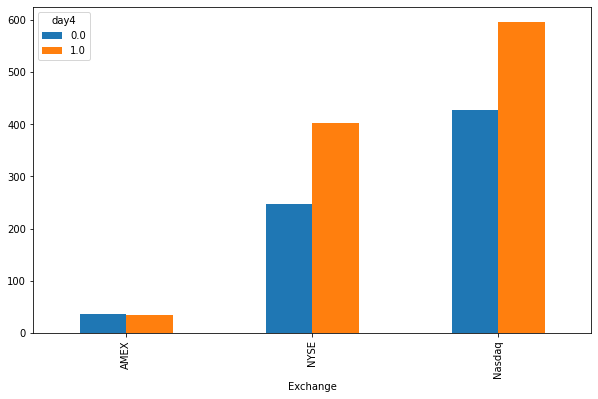

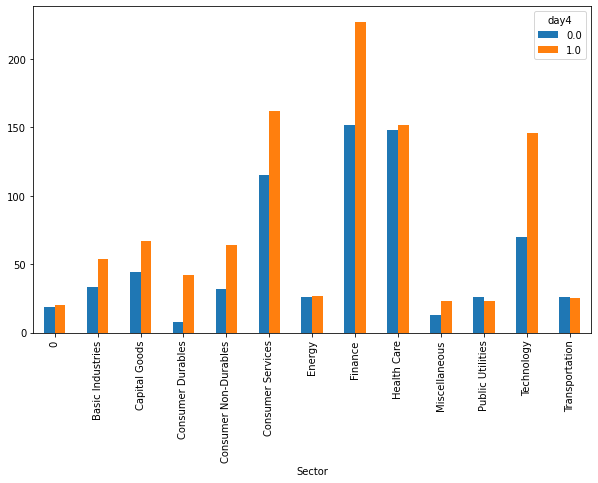

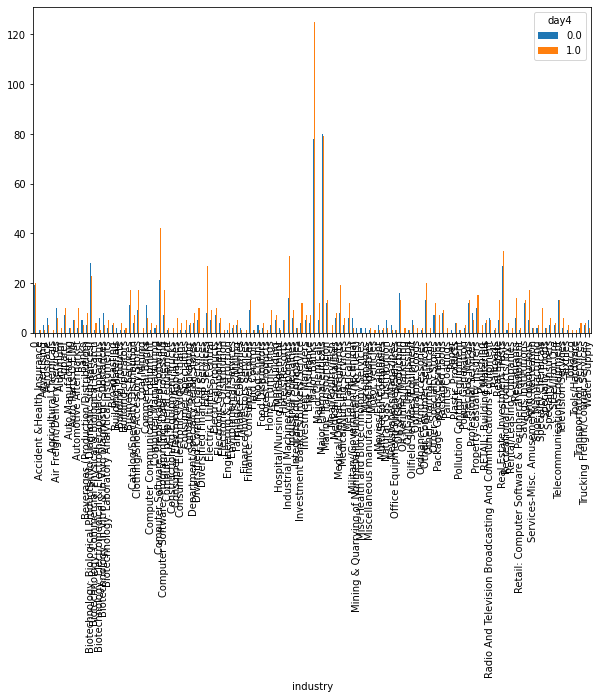

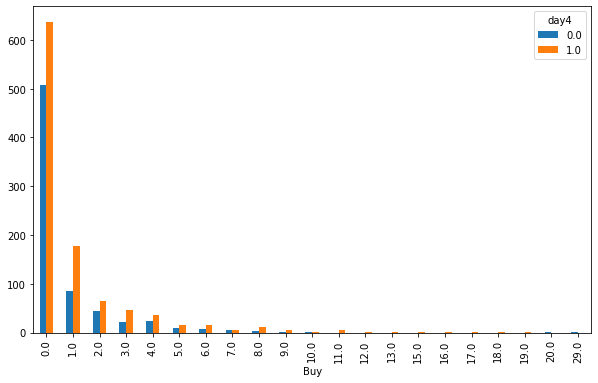

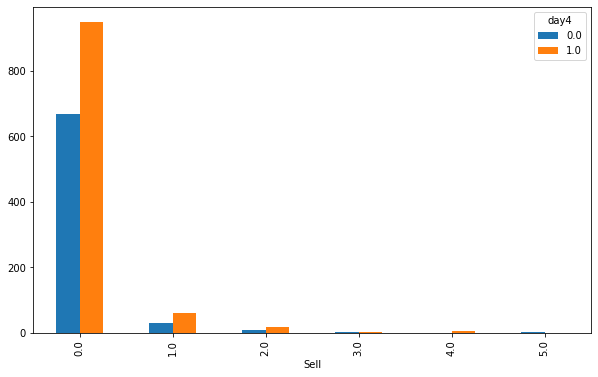

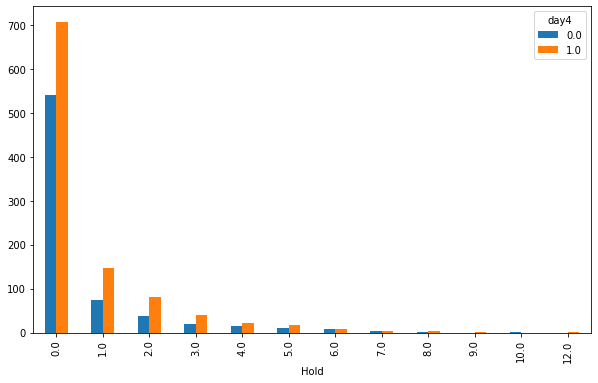

In [150]:
for column in category_columns:
    train.groupby([column, 'day4']).size().unstack().plot.bar(figsize=(10,6))

<AxesSubplot:xlabel='Exponential Moving Average', ylabel='day4'>

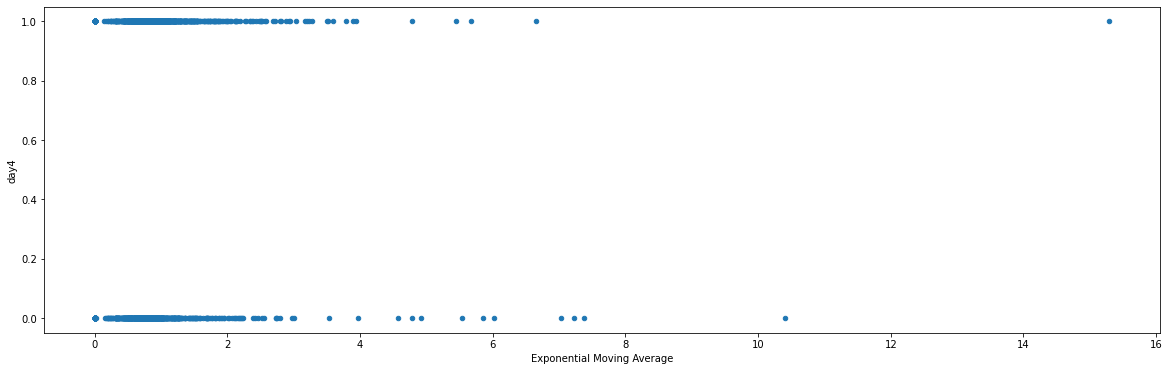

In [151]:
train.plot.scatter('Exponential Moving Average', 'day4', figsize=(20,6))

In [152]:
for column in category_columns:
    train[column] = train[column].astype('category').cat.codes

In [153]:
train.Expected = train.Expected.where(train.Expected != '-', 0)

In [154]:
train['Previous_Earnings_Date'] = train['Previous_Earnings_Date'].astype('datetime64')
train.Expected = train.Expected.astype('float64')

In [155]:
#now we'll create the test set

In [156]:
train_ex = train[train.Previous_Earnings_Date < pd.to_datetime('2020-09-01')]
test = train[train.Previous_Earnings_Date >= pd.to_datetime('2020-09-01')]

In [157]:
train.dtypes

Symbol                                object
Name                                  object
Exchange                                int8
Sector                                  int8
industry                               int16
dividendRate                         float64
lastSplitDate                          int64
lastSplitFactor                      float64
Buy                                     int8
Sell                                    int8
Hold                                    int8
Previous_Earnings_Date        datetime64[ns]
Expected                             float64
daysSinceLastDividend                  int64
BBP                                  float64
Exponential Moving Average           float64
day1                                 float64
day2                                 float64
day3                                 float64
day4                                 float64
dtype: object

In [158]:
X_train = train_ex.drop(columns=['Symbol', 'Name', 'Previous_Earnings_Date', 'day1', 'day2', 'day3', 'day4'])
X_test = test.drop(columns=['Symbol', 'Name', 'Previous_Earnings_Date', 'day1', 'day2', 'day3', 'day4'])
y_train = train_ex['day3']
y_test = test['day3']

In [170]:
K=100
accuracies = np.zeros(K-1)
std_acc = np.zeros((K-1))
for i in range(1,K):
    knn = KNN(n_neighbors = i, algorithm='brute').fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    accuracies[i-1] = metrics.accuracy_score(y_test, y_hat)
    
    std_acc[i-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

    
k=accuracies.argmax()+1
print('The best value of k is ', k)



The best value of k is  51


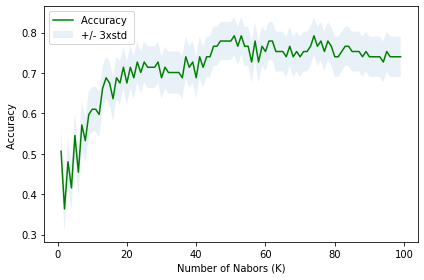

In [171]:
plt.plot(range(1,K), accuracies, 'g')
plt.fill_between(range(1,K), accuracies-1*std_acc, accuracies+1*std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [172]:
knn = KNN(n_neighbors = k).fit(X_train, y_train)
y_hat = knn.predict(X_test)
print("KNN Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print('KNN Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_hat))

KNN Accuracy Score:  0.7922077922077922
KNN Confusion Matrix:
[[12 10]
 [ 6 49]]


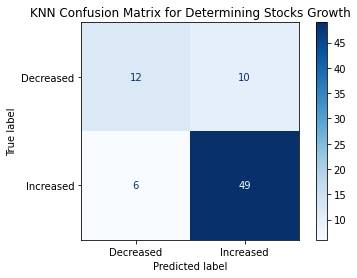

In [173]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test, display_labels=['Decreased', 'Increased'], cmap=plt.cm.Blues)
disp.ax_.set_title('KNN Confusion Matrix for Determining Stocks Growth')
plt.show()

In [161]:
from sklearn.linear_model import LogisticRegression as Classifier
    
classifier = Classifier(max_iter=10000).fit(X_train, y_train)
y_hat = classifier.predict(X_test)
print("LR Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print("LR Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_hat))

LR Accuracy Score:  0.5064935064935064
LR Confusion Matrix: 
[[ 2 20]
 [18 37]]


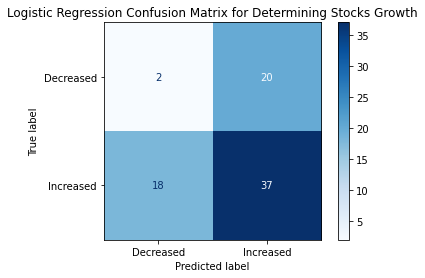

In [162]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Decreased', 'Increased'], cmap=plt.cm.Blues)
disp.ax_.set_title('Logistic Regression Confusion Matrix for Determining Stocks Growth')
plt.show()

RF Accuracy Score:  0.6363636363636364
RF Confusion Matrix: 
[[ 5 17]
 [11 44]]


<AxesSubplot:>

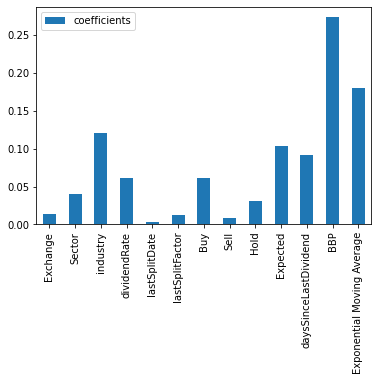

In [163]:
from sklearn.ensemble import RandomForestClassifier as Classifier
from sklearn import metrics

depth=3
min_samples=5
classifier = Classifier(max_depth=depth, min_samples_split=min_samples, random_state=1).fit(X_train, y_train)
y_hat = classifier.predict(X_test)
print("RF Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print("RF Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_hat))
df = pd.DataFrame(data=classifier.feature_importances_, index=X_train.columns, columns=['coefficients'])
df.plot(kind='bar')


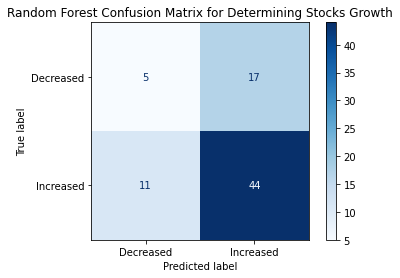

In [164]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Decreased', 'Increased'], cmap=plt.cm.Blues)
disp.ax_.set_title('Random Forest Confusion Matrix for Determining Stocks Growth')
plt.show()

In [165]:
import xgboost as xgb
from sklearn import metrics
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
param = {
'max_depth': 6,  # the maximum depth of each tree
'eta': 0.3,  # the training step for each iteration
'silent': 1,  # logging mode - quiet
'objective': 'multi:softprob',  # error evaluation for multiclass training
'num_class': 3,
'colsample_bytree': 0.4,
'gamma':0.05}  # the number of classes that exist in this datset
num_round = 100  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)
probs = bst.predict(dtest)

y_hat = probs.argmax(axis=1)
print("XGB Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print("XGB Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_hat))


[15:24:28] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGB Accuracy Score:  0.44155844155844154
XGB Confusion Matrix: 
[[ 7 15]
 [28 27]]


In [166]:
metrics.plot_confusion_matrix(dtrain, X_test, y_test)

ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier as BRFC
from imblearn.ensemble import RUSBoostClassifier as Boost
boost = Boost().fit(X_train, y_train)
y_pred3 = brfc.predict(X_test)

print("XGB Accuracy Score: ", metrics.accuracy_score(y_test, y_hat))
print("XGB Confusion Matrix: ")
metrics.confusion_matrix(y_test, y_hat)